# The Sparks Foundation

GRIP ( Graduate Rotational Internship Program) April 2024

By Akshay Kumar Singh

Data Science And Business Analytics

Task 4 : Exploratory Data Analysis - Global Terrorism

# Problem Statement
• Perform 'Exploratory Data Analysis' on dataset 'Global Terrorism'

• As a security/defense analyst, try to find out the hot zone of terrorism.

• What all security issues and insights you can derive by EDA?

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the Data Set

In [2]:
data = pd.read_csv(r"C:\\Users\\msian\\Downloads\\globalterrorismdb_0718dist.csv", encoding='latin-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Shape of the Data set

In [3]:
data.shape

(181691, 135)

The dataset contains 181691 Rows and 135 Columns

# Checking the name of all 135 columns

In [31]:
data.columns.values

array(['eventid', 'Year', 'Month', 'day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region', 'Region', 'State',
       'City', 'latitude', 'longitude', 'specificity', 'vicinity',
       'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'alternative', 'alternative_txt', 'multiple', 'success', 'suicide',
       'attacktype1', 'Attacktype', 'attacktype2', 'attacktype2_txt',
       'attacktype3', 'attacktype3_txt', 'targtype1', 'Targettype',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'Group', 'gsubname',
       'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain1', 'guncertain2', 'guncertain3', 'individual',
       'nperps', 'n

# Renaming the columns.

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)
data.columns.values

array(['eventid', 'Year', 'Month', 'day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region', 'Region', 'State',
       'City', 'latitude', 'longitude', 'specificity', 'vicinity',
       'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'alternative', 'alternative_txt', 'multiple', 'success', 'suicide',
       'attacktype1', 'Attacktype', 'attacktype2', 'attacktype2_txt',
       'attacktype3', 'attacktype3_txt', 'targtype1', 'Targettype',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'Group', 'gsubname',
       'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain1', 'guncertain2', 'guncertain3', 'individual',
       'nperps', 'n

# Here we created the new variable name "terrorism" which have the required columns for the EDA.

In [6]:
terrorism=data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill','Wound','target1','Group','Targettype','Weapon']]
terrorism

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,Group,Targettype,Weapon
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,Unknown,Government (General),Explosives


# checking the information of the data

In [7]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  Group       181691 non-null  object 
 14  Targettype  181691 non-null  object 
 15  Weapon      181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


Here we clearly see that there are <b>181691 entries and 16 rows

# Now check the null values

In [8]:
terrorism.isnull().sum()

Year              0
Month             0
day               0
Country           0
State           421
Region            0
City            434
latitude       4556
longitude      4557
Attacktype        0
kill          10313
Wound         16311
target1         636
Group             0
Targettype        0
Weapon            0
dtype: int64

there are null values in "Kill" ,"state", "latitude", "longitude", "wound" and "targettype" and will remove the null values by <b>fillna()

In [9]:
terrorism[["latitude" ,'longitude' , "kill" , "Wound","target1"]]=terrorism[["latitude" ,'longitude' , "kill" , "Wound","target1"]].fillna(0)

# Checking duplicates in Data

In [12]:
terrorism.duplicated().sum()

10695

# Removing the Duplicates

In [33]:
terrorism.drop_duplicates(inplace=True)

In [34]:
terrorism.duplicated().sum()

0

# Descriptive Statistics

In [15]:
# Descriptive analysis of the Dataset.
terrorism.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,170996.000000,170996.000000,170996.000000,170996.000000,1.709960e+05,170996.000000,170996.000000
mean,2002.989549,6.470584,15.521755,23.191154,-4.753216e+02,2.379044,3.030433
std,13.200843,3.391486,8.814323,18.465287,2.084219e+05,11.543711,35.348546
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,9.999547,3.055413e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.248484,4.314357e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.533753,6.871550e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


Now we can conclude that our Data is cleaned and all the duplicates are removed now we can perform the EDA task

# 1- Checking Terrorism rate in each year from 1970-2017

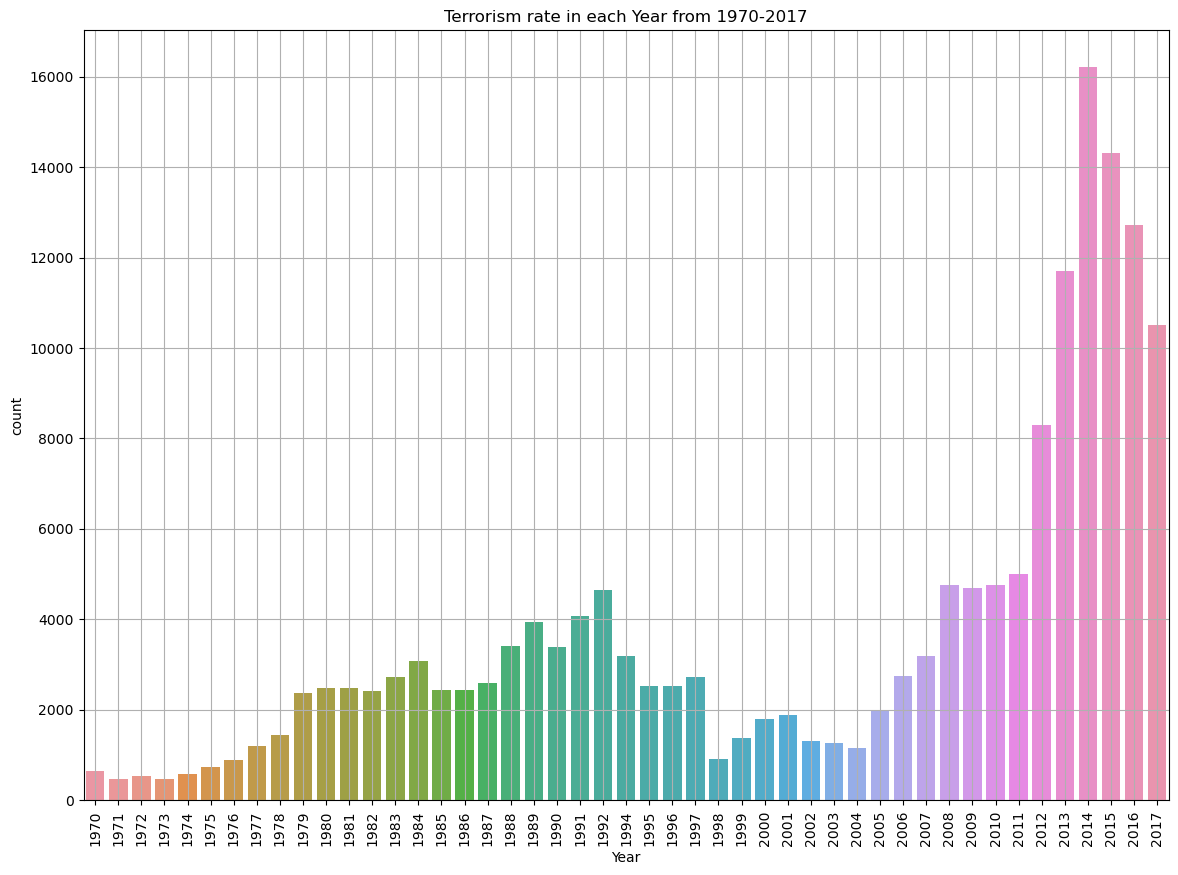

In [36]:
# creating Counplot
plt.figure(figsize=(14,10))
sns.countplot(data=terrorism , x="Year")
plt.xticks(rotation=90)
plt.title("Terrorism rate in each Year from 1970-2017")
plt.grid(True)
plt.show()


From above Graph we can clearly say that the <b>terrorism rate increases from year 2007</b> and the <b>peak terrorism rate recorded in year 2014</b> and after <b>that in 2015

# 2 -Types of Attacks are there in the terrorism

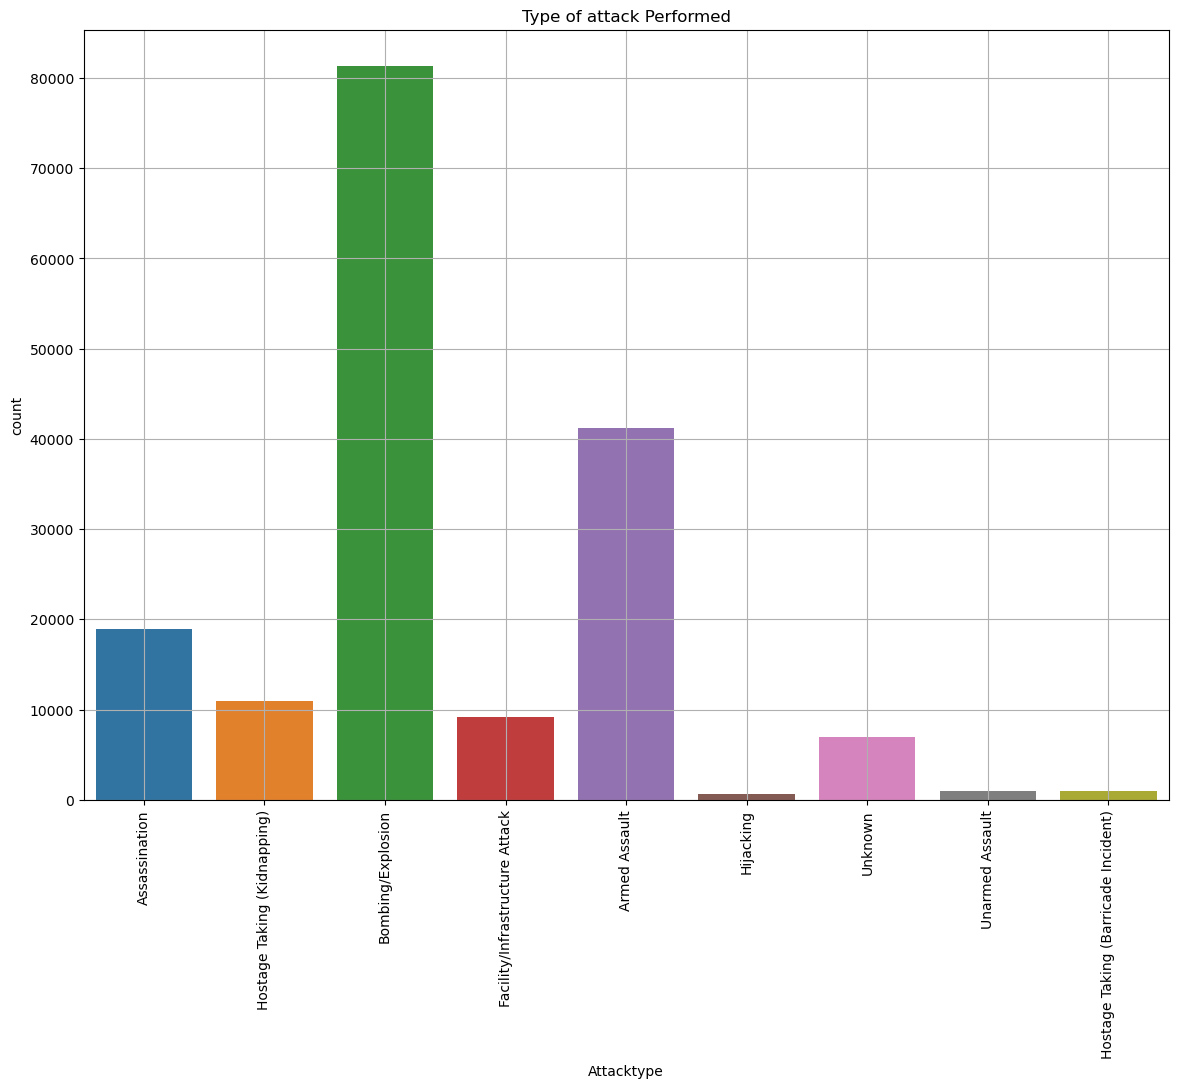

In [18]:
plt.figure(figsize=(14,10))
sns.countplot(data=terrorism , x="Attacktype")
plt.xticks(rotation=90)
plt.title("Type of attack Performed")
plt.grid()
plt.show()

Bombing/Explosion are the major attacks in Global terrorism

# 3 - Which country recorded the highest number of attacks?

In [37]:
country_attack = terrorism.Country.value_counts()[:10]
country_attack

Iraq              23112
Pakistan          13710
Afghanistan       12468
India             11532
Colombia           7490
Philippines        6764
Peru               5046
United Kingdom     4984
El Salvador        4296
Somalia            4085
Name: Country, dtype: int64

These are the top 10 countries with their values counts

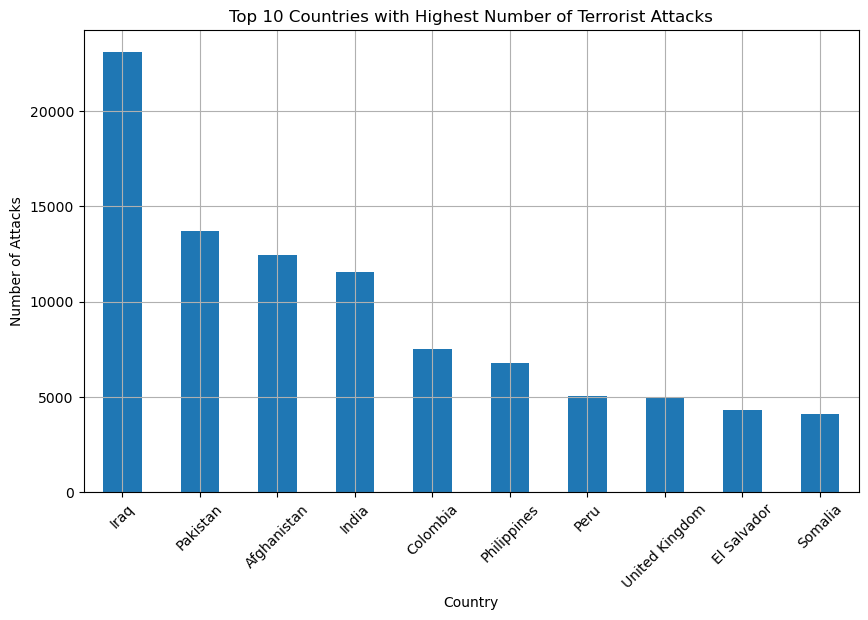

In [20]:

country_attack = terrorism.Country.value_counts()[:10]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
country_attack.plot(kind='bar')
plt.title('Top 10 Countries with Highest Number of Terrorist Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)  
plt.grid()
plt.show()


<b>Iraq</b> has recorded the highest numbers of attacks in the country.

# 4- Which City recorded the highest number of attacks?

In [21]:
x=terrorism.groupby(["City"]).size().reset_index(name="counts")
x

,City,counts
0,62 miles South of Dushanbe,1
1,A Coruna district,16
2,A'arbaniyeh,1
3,ANkara,1
4,Aab Kamra,1
...,...,...
36669,vinchos,1
36670,wakunai,1
36671,yacan,1
36672,yokohama,1


In [40]:
X=x=x.sort_values(by="counts",ascending=False)
Top10=X.head(10)
Top10

,City,counts
34517,Unknown,8113
3042,Baghdad,7430
16058,Karachi,2176
22828,Mosul,2058
4503,Belfast,2012
19571,Lima,1737
22519,Mogadishu,1547
29788,Santiago,1343
29535,San Salvador,1237
17457,Kirkuk,912


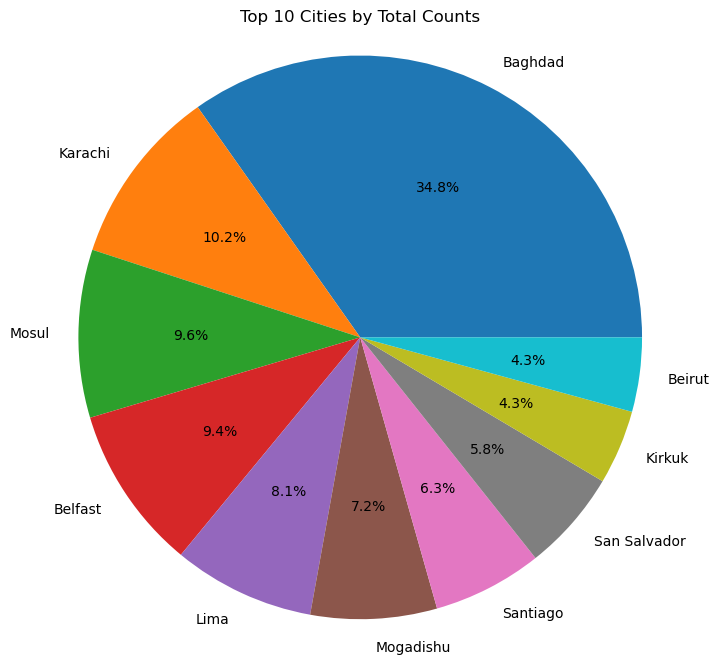

In [41]:
top10 = X.groupby("City")["counts"].sum().sort_values(ascending=False)[1:11]
plt.figure(figsize=(8, 8))
plt.pie(top10, labels=top10.index, autopct='%1.1f%%')
plt.title("Top 10 Cities by Total Counts")
plt.axis('equal')
plt.show()

<b>Baghdad </b> is the city which was attacked number of time

# 5 - Region Wise Terrorist Activities in Each Year

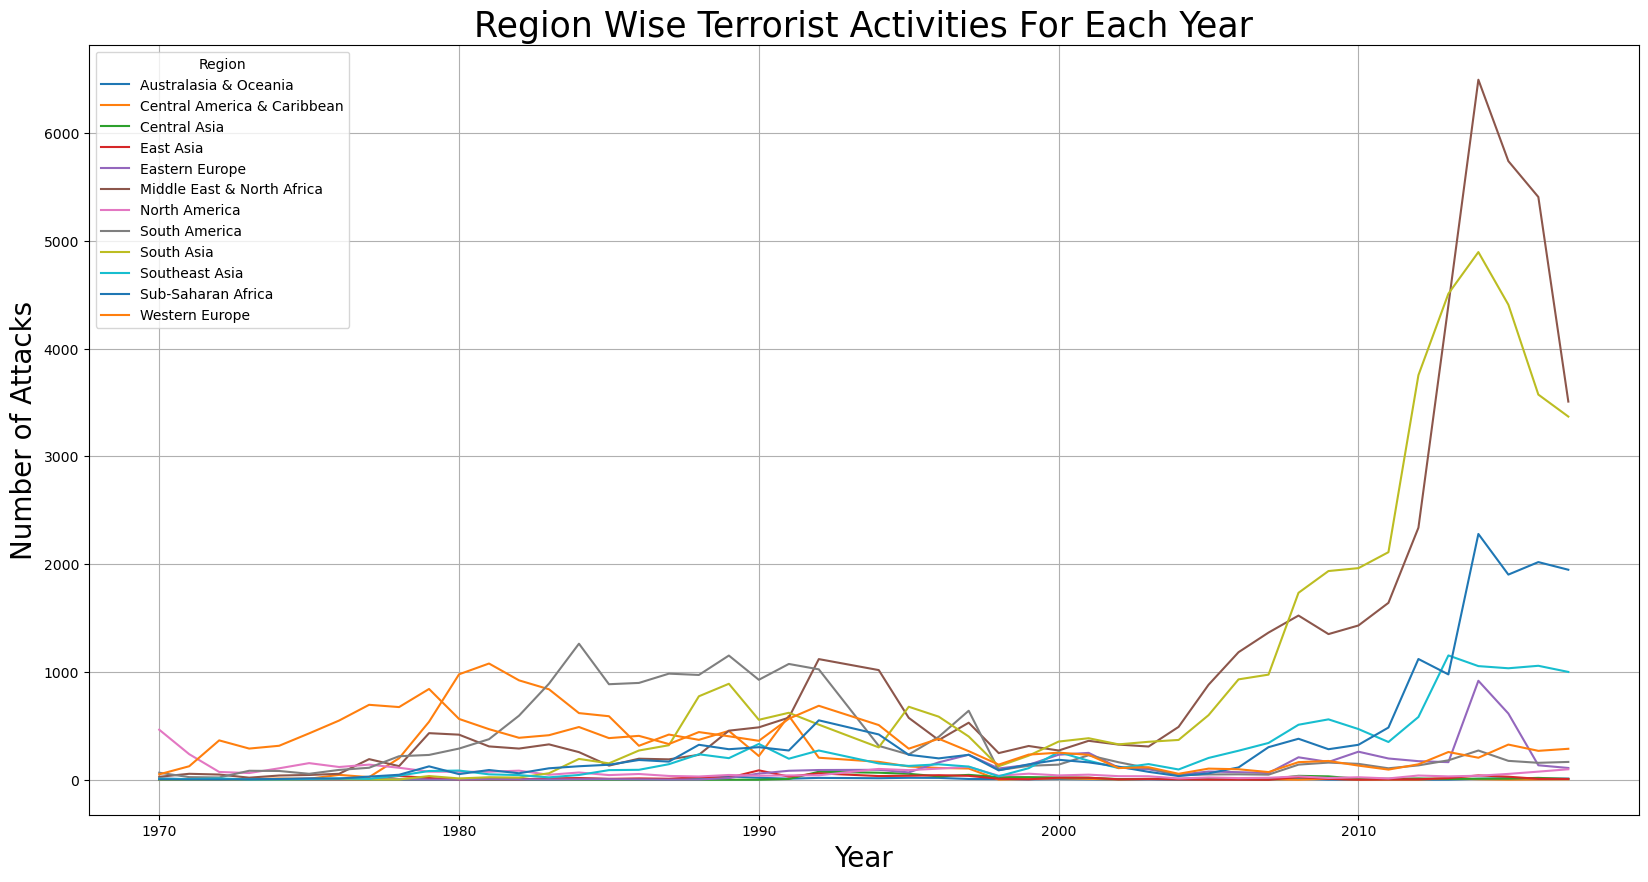

In [24]:
crosstab_data = pd.crosstab(terrorism.Year, terrorism.Region)

# Plotting the line chart
crosstab_data.plot(kind='line', figsize=(20, 10))

# Adding title and labels
plt.title('Region Wise Terrorist Activities For Each Year', fontsize=25)
plt.ylabel('Number of Attacks', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.grid()
plt.show()


<b>Middle East</b> & <b>North Africa</b> are the <b>region</b> with most <b>terrorist activites</b> happend in <b>each year. 

# 6 - Which Terrorist Groups are mostly involved in the Terrorism? 

In [45]:
group = terrorism.Group.value_counts()[1:10]
group

Taliban                                             7276
Islamic State of Iraq and the Levant (ISIL)         5072
Shining Path (SL)                                   3756
Al-Shabaab                                          3230
New People's Army (NPA)                             2695
Farabundo Marti National Liberation Front (FMLN)    2512
Irish Republican Army (IRA)                         2460
Revolutionary Armed Forces of Colombia (FARC)       2369
Boko Haram                                          2331
Name: Group, dtype: int64

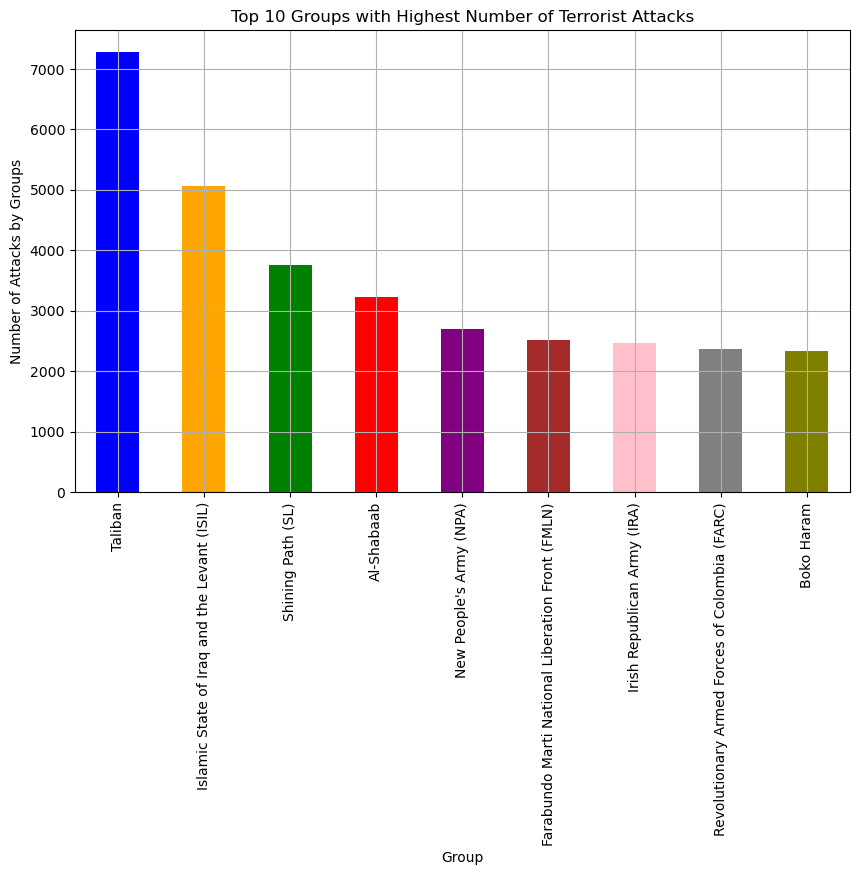

In [26]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

group.plot(kind='bar', color=colors)
plt.title('Top 10 Groups with Highest Number of Terrorist Attacks')
plt.xlabel('Group')
plt.ylabel('Number of Attacks by Groups')
plt.xticks(rotation=90)  
plt.grid()
plt.show()

<b>Taliban Group</b> was mostly involved in the Terrorism attack.

# 7-People Killed in Terrorist Attacks Each Year?

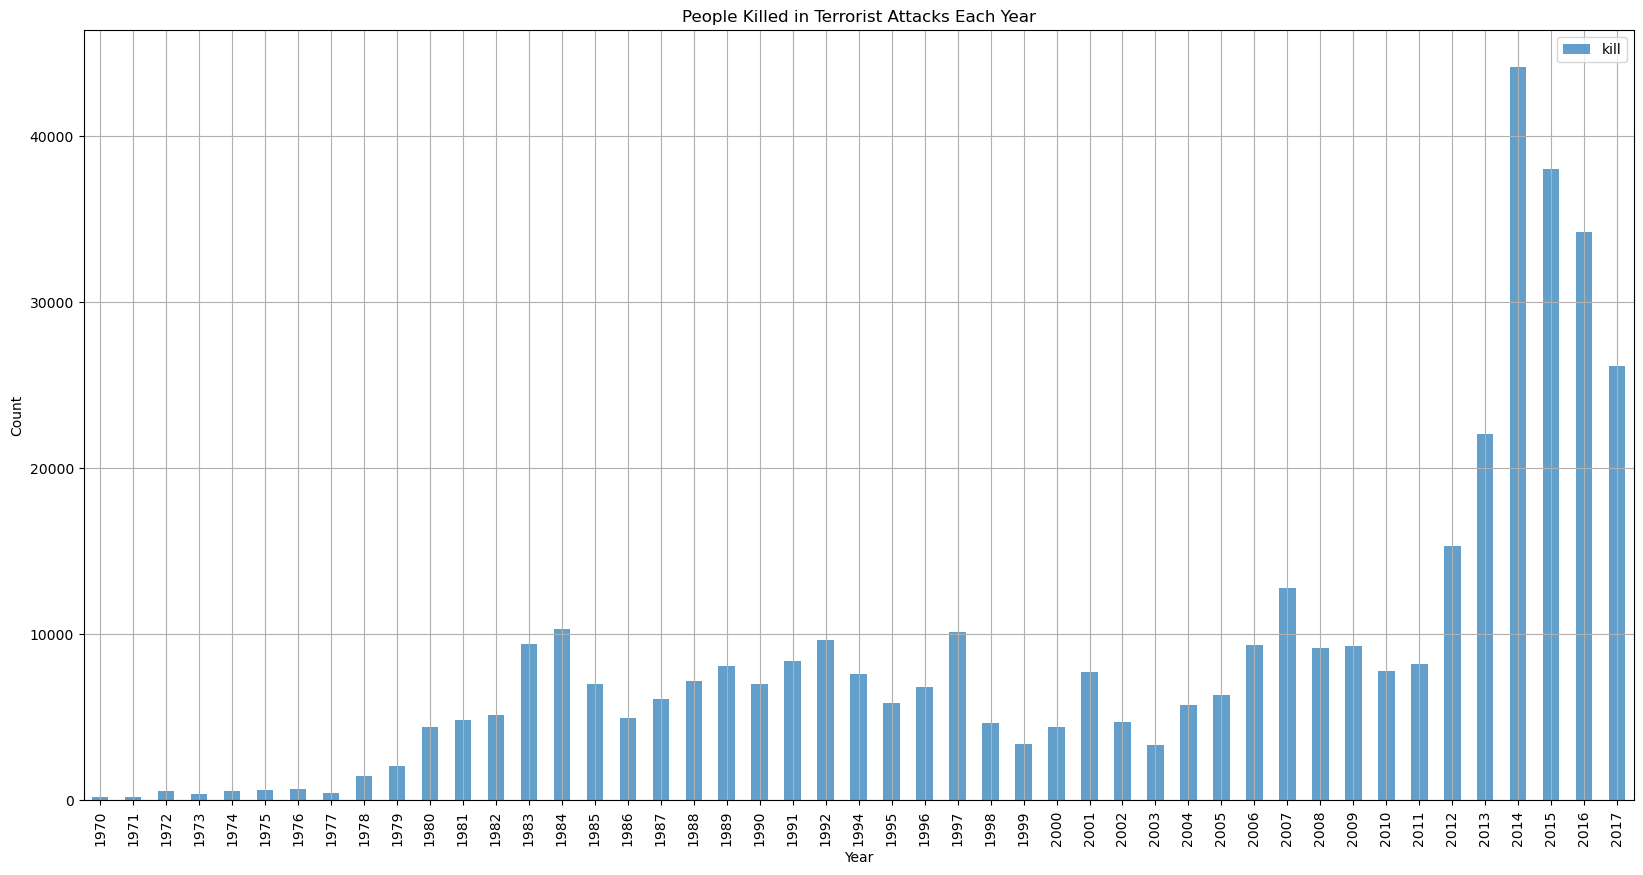

In [49]:
df = terrorism[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.title("People Killed in Terrorist Attacks Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Most of the people who died are in the Year of <b>2014

# 8- Weapons used in Terrorist activities

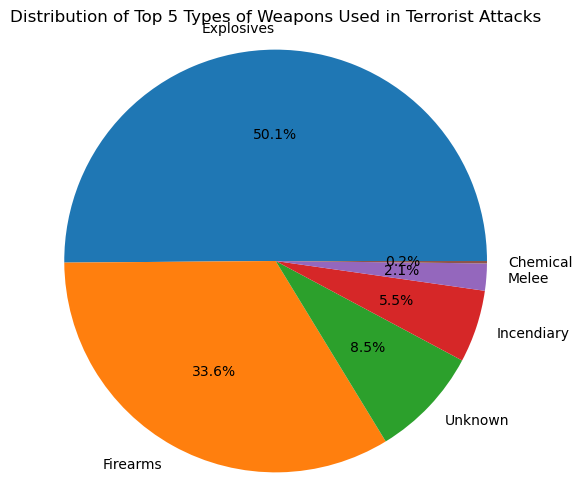

In [29]:
# Get the count of each weapon type
weapon_counts = terrorism['Weapon'].value_counts()

# Select only the top 5 weapon types
top_5_weapon_counts = weapon_counts.head(6)

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(top_5_weapon_counts, labels=top_5_weapon_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Top 5 Types of Weapons Used in Terrorist Attacks')

plt.show()


The above pie chart shows the percentage of Weapons used in activities is <b>Explosives.

# 9 - Terrorist targeted Area in Global Terrorism

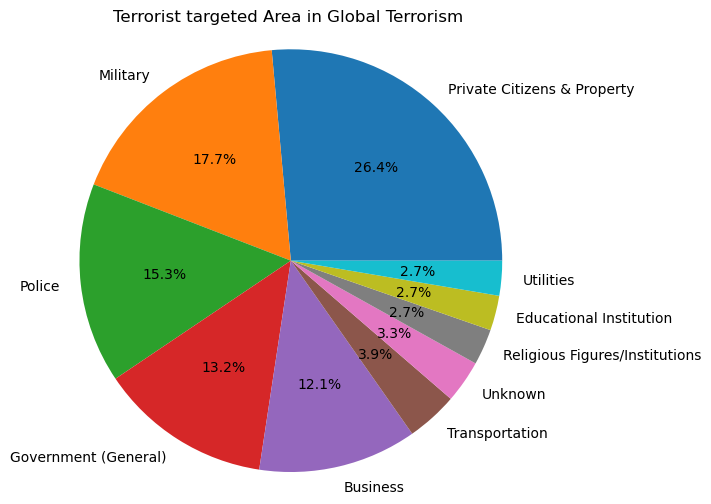

In [30]:
weapon_counts = terrorism['Targettype'].value_counts()

# Select only the top 5 weapon types
top_5_weapon_counts = weapon_counts.head(10)

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(top_5_weapon_counts, labels=top_5_weapon_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Terrorist targeted Area in Global Terrorism ')

plt.show()


The pie chart concludes that <b>Private Citizens & Property</b> are the top target Area.

# 10- How many People Died in each AttackType?

In [54]:
Kill = terrorism.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
Kill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,158576.0,24439.0,155366.0,3577.0,3717.0,4478.0,23892.0,880.0,31882.0


Most of the People Died in <b>Armed Assault.

# Conclusion
1 - Terrorism rate increases from year 2007 and the peak terrorism rate recorded in year <b>2014</b> and after that in <b>2015.

2 - <b>Bombing/Explosion</b> are the major attacks in Global terrorism.

3 - <b>Iraq</b> has recorded the highest numbers of attacks in the country.

4 - <b>Taliban Group</b> was mostly involved in the Terrorism attack.

5 - <b>Middle East & North Africa</b> are the region with most terrorist activites happend in each year.

6 - <b>Baghdad</b> is the city which was attacked number of time.

7 - Weapons used in activities is <b>Explosives.